<a href="https://colab.research.google.com/github/min207/ESAA/blob/main/ESAA1107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. 분류**
### **01. 분류(Classification)의 개요**

- 지도학습: 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
  + 분류: 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습, 모델 생성, 미지의 레이블 값 예측
    - 나이브 베이즈
    - 로지스틱 회귀
    - 결정 트리
    - 서포트 벡터 머신
    - 최소 근접 알고리즘
    - 신경망
    - 앙상블

- 앙상블 방법: 다르거나 같은 머신러닝 알고리즘을 결합
  + 배깅 방식
    - 랜덤 포레스트: 뛰어난 예측 성능, 빠른 수행 시간, 유연성
  + 부스팅 방식
    - 그래디언트 부스팅: 뛰어난 예측 성능, 느린 수행 시간
    - XgBoodst, LightGBM 등 단점을 보완한 알고리즘으로 정형 데이터 분류 영역에서 가장 활용도가 높은 알고리즘이 되었음
  + 스태킹 기법: 앙상블의 앙상블
  + 결정 트리: 앙상블의 기본 알고리즘으로 주로 사용됨
    - 쉽고 유연성이 높음, 사전 가공의 영향이 적음
    - 복잡한 규칙 구조, 과적합으로 인한 성능 저하
    - 위의 단점이 앙상블 기법에서는 예측 성능을 향상시키는 장점으로 적용됨

### **02. 결정 트리**
결정 트리: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
  - 규칙 노드: 규칙 조건
  - 리프 노드: 결정된 클래스 값
  - 서브 트리: 새로운 규칙 조건마다 생성
> 규칙 노드가 많으면 복잡해지고, 과적합으로 이어질 수 있음. 즉 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
  - 따라서 최대한 균일한 데이터 세트를 구성할 수 있더록 트리를 분할하는 것이 필요

    > + 균일한 데이터 세트: 균일도가 높을 수록 데이터를 구분하는 데 필요한 정보의 양이 적어짐
    + 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

- 정보의 균일도 측정 방법
  + 정보 이득 지수: 엔트로피 기반, 1- 엔트로피 지수
  + 지니 계수: 경제학에서 불평등 지수를 나타낼 때 사용, 사이킷런의 DecisionTreeClassifier에서 사용됨

- 결정 트리 모델의 특징
  + 정보의 균일도를 기반으로 하고 있어서 알고리즘이 쉽고 직관적
  + 규칙/리프 노드의 생성을 확인할 수 있고, 시각화 가능
  + 스케일링과 정규화 같은 전처리 작업 필요x
  > + 반면, 과적합으로 정확도가 떨어진다는 단점
    + 이런 단점을 해결하기 위해 사전에 트리의 크기를 제한

- 결정 트리 파라미터
분류를 위한 DecisionTreeClassifier, 회귀를 위한 DecisionTreeRegressor 클래스, CART 알고리즘 기반
  + min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수(디폴트-2)
  + min_samples_leaf: 말단 노드가 되기 위한 최소한의 샘플 데이터 수
  + max_features: 최적의 분할을 위해 고려할 최대 피처 개수(디폴트-None)
  + max_depth: 트리의 최대 깊이(디폴트-None)
  + max_leaf_nodes: 말단 노드의 최대 개수

- 결정 트리 모델의 시각화: Graphviz 패키지 사용
  + Graphviz: 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지 
    - 파이썬에서는 export_graphvix() API 제공
    > 함수 인자로 학습이 완료된 Estimator, 피처/레이블의 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화후 출력


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터 로딩 및 학습/테스트 데이터 세트로 분리하기
iris_data = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris_data.data, iris_data.target,
                                                 test_size=0.2,random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
# 그래프 형태로 시각화하기
from sklearn.tree import export_graphviz

## export_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일을 생성하기
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

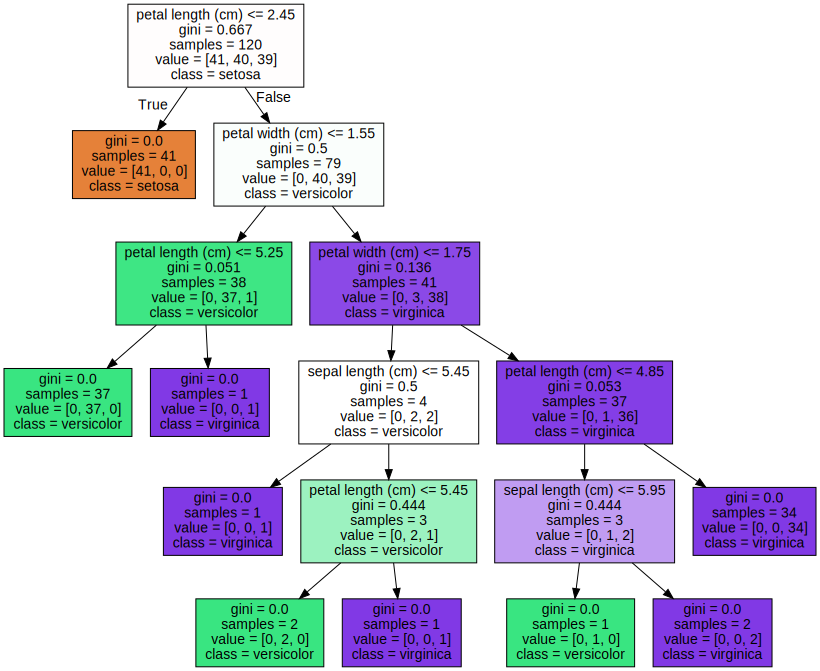

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

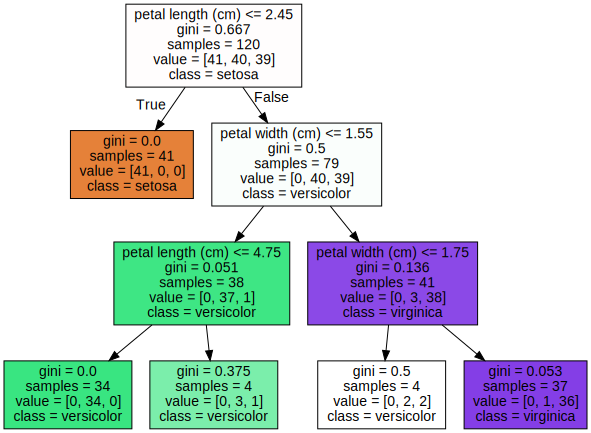

In [ ]:
# max_depth, min_samples_leaf 설정
dt_clf1 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4, random_state = 156)
dt_clf1.fit(X_train , y_train)

export_graphviz(dt_clf1, out_file="tree.dot", class_names=iris_data.target_names , feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

> 결정 트리가 간결해 진 것을 확인

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


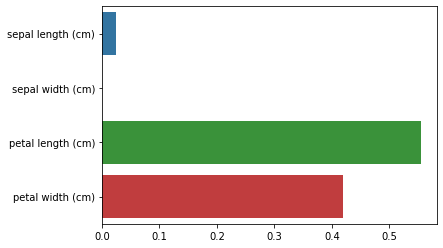

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

> petal_length의 피처 중요도가 가장 높음
- 결정 트리는 규칙 트리의 시각화, featrue_importances_ 속성을 통해 직관적인 이해 가능

- 결정 트리 과적합(Overfitting)
  + make_classification(): 피처 데이터 세트, 클래스 레이블 데이터 세트를 호출 시 반환

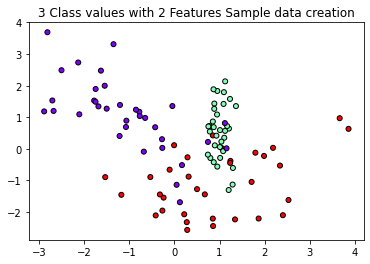

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1,random_state = 0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, cmap = 'rainbow', edgecolor = 'k')

> 2차원 그래프, 3개의 클래스 값이 색깔로 구분
- X_features와 y_labels 데이터 세트 기반으로 결정 트리 학습
  + 별다른 제약 없이 학습 수행
  + visualize_boundary(): 클래스 값 예측 결정 기준을 색상과 경계로 나타냄

In [ ]:
import numpy as np

# visualize_boundary() 함수
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

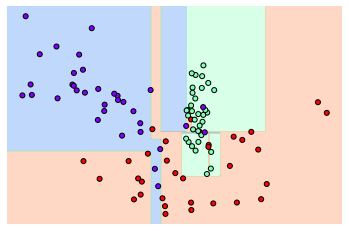

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

> 이상치 데이터 분류를 위해 분할이 많이 일어나서 결정 기준 경계가 많음
> - 복잡한 모델은 다른 형태의 데이터 세트를 예츠 시 정확도가 떨어짐

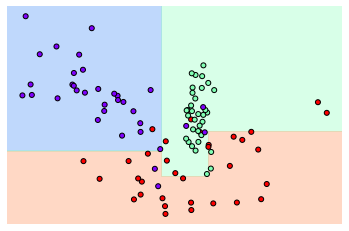

In [ ]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

> 이상치에 크게 반응하지 않으면서 더 일반화된 분류 규칙을 따름
> - 다른 데이터 세트에서도 낮지 않은 정확도를 보임

### **03. 앙상블 학습**
앙상블 학습을 통한 분류: 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법
> 예시: 랜덤 포레스트, 그래디언트 부스팅 알고리즘, XGboost, LightGBM, 스태킹 등

- 보팅(Voting): 서로 다른 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정

- 배깅(Bagging): 서로 같은 유형의 알고리즘을 기반으로 한 여러 개의 분류기가 데이터 샘플링을 서로 다르게 가져가고(부트스트래핑 분할 방식), 투표를 통해 최종 예측 결과를 결정
  > + 랜덤 포레스트 알고리즘

- 부스팅(Boosting): 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 에측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습, 예측을 진행
  > + 그래디언트 부스트, WGBoost, LightGBM

- 스태킹(Stacking): 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법


----
####**> 보팅**
 + 하드 보팅: 다수결 원칙처럼 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
 + 소프트 보팅: 분류기들의 레이블 값 결정 확ㄱ률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정(일반적으로 예측 성능이 더 높아 자주 사용됨)
 
+ 보팅 분류기(Voting Classifier)
    - 사이킷런은 VotingClassifier 클래스를 제공
    - 예제: 로지스틱 회귀와 KNN을 기반으로 보팅 분류기 만들기


In [8]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [9]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


> VotingClassifer
  - 주요 생성 인자로 estimatos와 voting 값 입력받음
    + estimator: 리스트 값으로 보팅에 사용될 여러 개의 분류기 객체들을 튜플 형식으로 입력
    + voting: hard는 하드 보팅, soft는 소프트 보팅 방식을 적용하라는 의미(디폴트-hard)

> 보팅으로 여러 개의 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되는 것은 아님

- 머신러닝 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 높은 유연성을 가지고 대처하느냐가 중요한 평가요소가 됨
  + 편향-분산 트레이드오프는 머신러닝이 극복해야할 중요한 과제
    - 예시: 대부분 결정 트리 알고리즘을 기반으로 한 배깅, 부스팅은 오히려 과적합이 발생해 예측 성능이 떨어질 수 있지만, 앙상블 학습을 통해 다양한 상황을 학습함으로써 단점을 보완하고 편향-분산 트레이드오프의 효과를 극대화 가능

###**04. 랜덤 포레스트**
- 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 배깅
- 비교적 빠른 수행 속도, 다양한 영역에서 높은 예측 성능을 보임
- 결정 트리 알고리즘을 기반으로 하여 직관적임
  + 부트스트래핑 분할 방식: 여러 개의 데이터 세트를 중첩되게 분리
  + 사이킷런에서 RandomForestClassifier 클래스 제공

In [17]:
import pandas as pd

# ValueError: Duplicate names are not allowed
# 위 오류를 수정하기 위한 코드
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

# 별도의 테스트셋으로 예측 성능 평가
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


- 랜덤 포레스트 하이퍼 파라미터 및 튜님
  + 하이퍼 파라미터가 너무 많고, 튜닝을 위한 시간이 많이 소모된다는 단점이 있음
  + 하이퍼 파라미터
    - n_estimators: 결정 트리의 개수 지정 / 디폴트-10
    - max_features: 결정 트리의 max_features와 동일, 디폴트-auto(=sqrt)
    - max_depth: 결정트리의 과적합을 개선하기 위해 사용
    - min_samples_leaf: 결정트리의 과적합을 개선하기 위해 사용

> GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


> n_estimators 300으로 증가, 최적하 하이퍼 파라미터 데이터로 다시 RandomForestClassifier 학습 후 별도의 테스트 데이터 세트에서 예측 성능 측정

In [20]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


> feature_importances 속성을 이용해 피처의 중요도를 막대그래프로 시각화

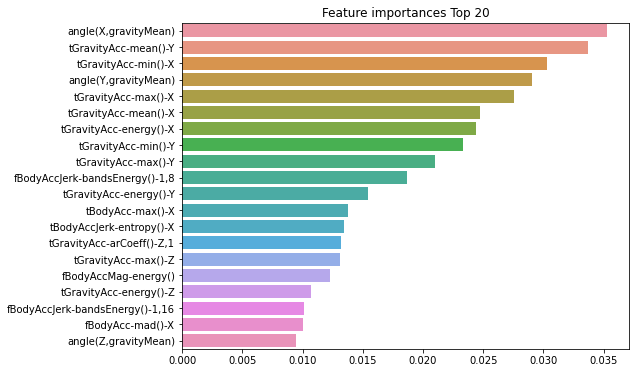

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

###**05. GBM**
- 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습/예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
  + AdBoost: 오류 데이터에 가중치를 부여하면서 부스팅 수행
  + 그래디언트 부스트: 에이다부스트와 유사한, 가중치 업데이트를 경사 하강법 이용
    > - 경사 하강법: 오류식 h(x) = y - F(x)를 최소화하는 방향으로 가중치를 업데이트
    - 분류, 회귀 가능
    - 사이킷런에서 GradientBoostingClassifier 클래스 제공

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 706.4 초 


- GBM 하이퍼 파라미터 및 튜닝
  + loss: 경사 하강법에서 사용할 비용 함수 지정 / 디폴트-deviance
  + learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률으로, weak learner가 순차적으로 오류 값을 보정해 나가는데 적용하는 계수 / 디폴트-0.1
  + n_estimators: weak learner의 개수 / 디폴트-100
  + subsample: weak learner가 학습에 사용하는 데이터의 샘플링 비율 / 디폴트-1


> GridSearchCV를 이용한 하이퍼 파라미터 최적화

In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


> 위의 설정을 그대로 테스트 데이터 세트에 적용하여 예측 정확도 확인

In [24]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393


> 예측 성능이 뛰어나지만 수행 시간이 오래걸린다는 단점